# **Data science workshop project**
**Team:** Elad, Tsach, Oz, Eva

**Problem:** The predictors of in-hospital mortality for admitted patients remain poorly characterized.

**Goal of the project**: We aimed to develop and validate a prediction model for all-cause in-hospital mortality among admitted patients.


## Introduction: understand and clean the dataset

In [45]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [46]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Machine learning library
import sklearn
from sklearn.model_selection import train_test_split

from Model.ModelModule import DSWorkshopModel  # separate python file which hold data and run models

In [47]:
complete_data = pd.read_csv('dataset.csv') #load the dataset

In [48]:
complete_data.head() #beginning of the dataset

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [49]:
complete_data.shape   #dataset sizes: 85 columns and 91713 rows/patients in the original dataset

(91713, 85)

In [50]:
#column / features and data types
complete_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [51]:
complete_data.isnull().sum(axis=0).sort_values(ascending=False)

Unnamed: 83               91713
d1_potassium_max           9585
d1_potassium_min           9585
h1_mbp_noninvasive_min     9084
h1_mbp_noninvasive_max     9084
                          ...  
icu_stay_type                 0
icu_id                        0
elective_surgery              0
hospital_id                   0
hospital_death                0
Length: 85, dtype: int64

In [52]:
class_prediction = "hospital_death" #label

([<matplotlib.patches.Wedge at 0x24326ea83a0>,
 [Text(-1.0598172020063896, 0.294597179774939, '0'),
  Text(1.0598172295885635, -0.2945970805476902, '1')],
 [Text(-0.5780821101853033, 0.16068937078633036, '91.4%'),
  Text(0.5780821252301255, -0.16068931666237643, '8.6%')])

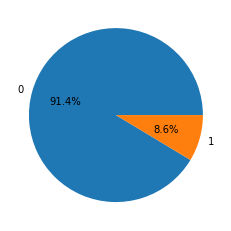

In [53]:
unique_labels = np.unique(complete_data[class_prediction])
plt.pie(np.array([len(complete_data[complete_data[class_prediction]==label]) for label in unique_labels ]), labels = list(unique_labels), autopct='%1.1f%%')

The distribution of classes is realy different so it will be a challenge for the model to  predict class 1 whih is "Living"

The distribution of the two classes is not balanced at all : it will be challenging because most of the patients in the dataset haven t hospital mortality.

In [54]:
numerical_features = ["age", "bmi","height", "weight", 
                      "pre_icu_los_days", "gcs_eyes_apache","apache_2_diagnosis",
                      "gcs_motor_apache", "gcs_verbal_apache", "heart_rate_apache",
                     "map_apache", "resprate_apache", "temp_apache", "d1_diasbp_max",
                      "d1_diasbp_min","d1_diasbp_noninvasive_max", "d1_diasbp_noninvasive_min",
                      "d1_heartrate_max", "d1_heartrate_min", "d1_mbp_max", "d1_mbp_min", 
                      "d1_mbp_noninvasive_max", "d1_mbp_noninvasive_min", "d1_resprate_max", "d1_resprate_min",
                      "d1_spo2_max", "d1_spo2_min", "d1_sysbp_max", "d1_sysbp_min",
                      "d1_sysbp_noninvasive_max", "d1_sysbp_noninvasive_min", "d1_temp_max", "d1_temp_min",
                      "h1_diasbp_max", "h1_diasbp_min", "h1_diasbp_noninvasive_max", "h1_diasbp_noninvasive_min",
                      "h1_heartrate_max", "h1_heartrate_min", "h1_mbp_max", "h1_mbp_min",
                      "h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min", "h1_resprate_max", "h1_resprate_min",
                      "h1_spo2_max", "h1_spo2_min", "h1_sysbp_max", "h1_sysbp_min",
                      "h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min", "d1_glucose_max", "d1_glucose_min",
                      "d1_potassium_max", "d1_potassium_min", "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob",
                      "apache_3j_diagnosis"]

categorial_features = ["hospital_id", "ethnicity", "gender", "icu_admit_source", "apache_3j_bodysystem", "apache_2_bodysystem", "icu_stay_type", "icu_type"]

binary_features = ["arf_apache", "gcs_unable_apache", "intubated_apache", 
                   "ventilated_apache", "elective_surgery", "apache_post_operative",
                   "aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure", "immunosuppression",
                   "leukemia", "lymphoma", "solid_tumor_with_metastasis"]

## Influence of the age of the patient on the hospital death

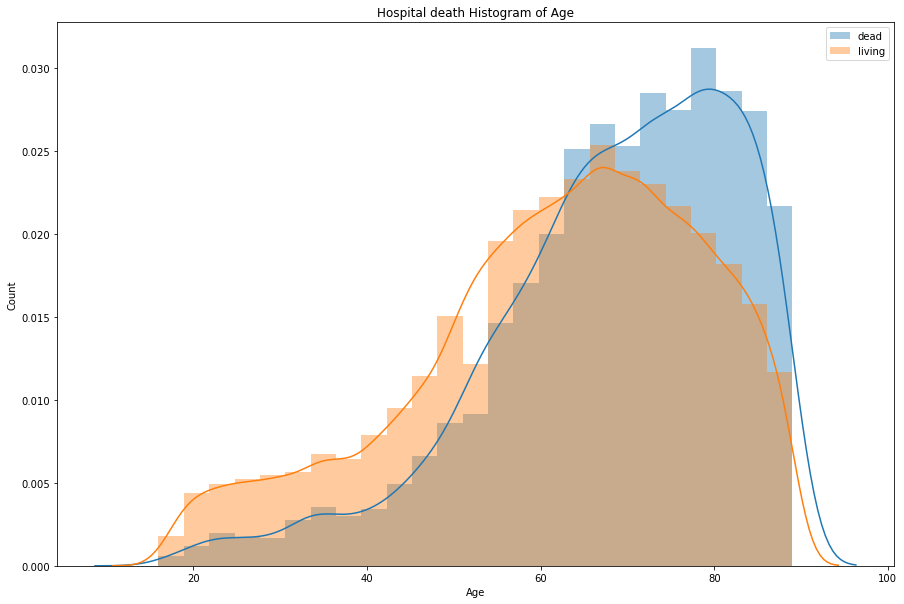

In [55]:
dead_patient = complete_data[complete_data["hospital_death"] == 1]
living_patient =  complete_data[complete_data["hospital_death"] == 0]
#first we create the figure using Matplotlib
fig,ax=plt.subplots(figsize=(15,10))
#"age"
#create two histograms using Seaborn:
sns.distplot(dead_patient.age, bins = 25, kde = True, label = "dead",ax=ax)
sns.distplot(living_patient.age, bins = 25, kde = True, label = "living",ax=ax)

#Don't forget to make titles for the figure and axes
plt.title('Hospital death Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc="upper right")

## Methods for dataset

In [56]:
def getBasicDataset():
    complete_data = pd.read_csv('dataset.csv') #load the dataset
    complete_data.drop(complete_data.columns[[0,1,83]], axis=1, inplace=True) #delete feature 83
    complete_data = pd.get_dummies(complete_data,columns=categorial_features) #one hot encoding
    return complete_data

In [57]:
# Filling missing NUMERICAL values.
def fill_missing_num_values_with_mean(complete_data):
    for feature in numerical_features:
        if feature in complete_data.columns:
            mean_value = complete_data[feature].mean()
            complete_data[feature].fillna(value=mean_value, inplace=True)
    return complete_data

# features_with_missing_values = complete_data.columns[complete_data.isnull().any()]
# for f in features_with_missing_values:
#     name = "missing " + f
#     if f in numerical_features:
#         complete_data[name] = (complete_data[f].isnull()).astype(int)

In [58]:
def fill_missing_values_binary(df): # fill with 0 in binary feature when data is missing
    for f in binary_features:
        if f in df.columns:
            df[f] = df[f].fillna(0)
    return df

In [59]:
def runModel(df):
    model = DSWorkshopModel(df)
    train_data = df.drop('hospital_death', axis=1)
    true_values = df.hospital_death
    x_train, x_test, y_train, y_test = train_test_split(train_data, true_values, test_size=0.2, stratify=true_values, shuffle=True)
    model.set_split(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
    model.train()
    return model

## 1. Run Model on original dataset 
(We filled all missing values which are numerical with mean and add column which tell when data is missing), we also apply one hot encoding for original categorical features. 

In [60]:
df1 = getBasicDataset()
df1 = fill_missing_num_values_with_mean(df1)
df1 = fill_missing_values_binary(df1)

In [61]:
model = DSWorkshopModel(df1)
model.print_details()

Data Shape: (91713, 266)
Data preview:


,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,68.0,22.730000,0,180.3,92,0.541667,73.90000,113.0,502.01,0,...,0,0,0,0,1,0,0,0,0,0
1,77.0,27.420000,0,160.0,90,0.927778,70.20000,108.0,203.01,0,...,0,0,0,0,0,0,0,1,0,0
2,25.0,31.950000,0,172.7,93,0.000694,95.30000,122.0,703.03,0,...,0,0,0,0,0,0,0,1,0,0
3,81.0,22.640000,1,165.1,92,0.000694,61.70000,203.0,1206.03,1,...,0,0,0,0,1,0,0,0,0,0
4,19.0,29.185818,0,188.0,91,0.073611,84.02834,119.0,601.01,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
# Preparing the data
train_data = df1.drop('hospital_death', axis=1)
true_values = df1.hospital_death
x_train, x_test, y_train, y_test = train_test_split(train_data, true_values, test_size=0.2, stratify=true_values, shuffle=True)

In [63]:
model.set_split(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

In [64]:
model.train()

C:\Users\eva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
models_predictions, pred_results = model.test()

In [66]:
print(pred_results)

         Method  precision_score  recall_score  f1_score  accuracy_score  \
0  RandomForest         0.746964      0.233102  0.355320        0.927002   
1    ExtraTrees         0.761194      0.193304  0.308312        0.925149   
2       Votingr         0.817680      0.093493  0.167800        0.919969   

    time   
0  54.22s  
1  52.88s  
2  74.48s  


We can see that the best model with "basic work on dataset" is Voting classifier with precision of 82% and 92 % accuracy.
Voting classifier:"A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output."
In our case this model try those models: LogisticRegression, RandomForest and KNN

Let s try to check results of the models

In [67]:
from sklearn.metrics import confusion_matrix
def conf_matrix(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Confusion Matrix\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

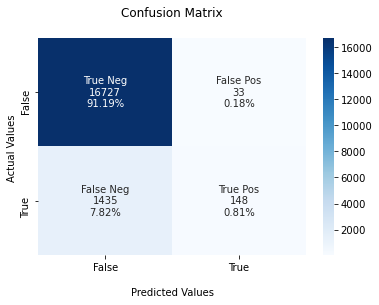

In [68]:
cf_matrix = confusion_matrix(y_test.to_numpy(), models_predictions[-1])
conf_matrix(cf_matrix)

A true positive is an outcome where the model correctly predicts the positive class. Similarly, a true negative is an outcome where the model correctly predicts the negative class.

A false positive is an outcome where the model incorrectly predicts the positive class. And a false negative is an outcome where the model incorrectly predicts the negative class.

We can see that we need to reduce the amount of false negative: so we need to maybe improve feature which influence a lot on the result.
Let s try to check SHAP result to see feature importance

To Do : shap need to work and improve the model based on results of SHAP

In [69]:
# import shap
# shap.initjs()

# # def predict_fcn(x):
# #     return classifiers[2].predict_proba(x)[:,1] #need to add in module method for that - for ELAD
# background_data = shap.maskers.Independent(x_train, max_samples=100)
# explainer = shap.Explainer(predict_fcn, background_data)
# shap_values_100 = explainer(x_test[:100])

# #Explaining a prediction of "Living" 0
# shap.plots.waterfall(shap_values_100[0], max_display=14)

In [70]:
#explaining a prediction of "death" 1
#shap.plots.waterfall(shap_values_100[2], max_display=14)

## 2. First try to improve the model : improve dataset with improving BMI data

In [71]:
df2 = getBasicDataset()
bmi_set = df2[['bmi','weight','height']]
bmi_set[bmi_set.isnull().any(axis=1)].head(10)

,bmi,weight,height
4,NaN,NaN,188.0
7,NaN,NaN,165.0
8,NaN,NaN,170.2
12,NaN,NaN,175.3
13,NaN,NaN,172.7
15,NaN,NaN,160.0
22,NaN,NaN,162.6
28,NaN,NaN,160.0
37,NaN,NaN,151.8
41,NaN,NaN,165.1


Bmi is a feature which depends on weigh and heigh which already appear in the dataset. BMI has many missing value but when it is missing, also weigh or heigh is missing so we cannot compute it to fill missing values.

In [72]:
def createBMI_cat(complete_data):
    bmi_cat = ['Severe Thinness', 'Moderate Thinness','Mild Thinness','Normal', 
           'Overweight','Obese l1',"Obese l2"," Obese l3","missing bmi 2"]
    category_bmi = pd.cut(complete_data['bmi'], bins=[0,16,17,18.5,25,30,35,40,80,100], labels=bmi_cat)
    complete_data.insert(9,'bmi group',category_bmi)
    complete_data.drop('bmi', inplace=True, axis=1)
    complete_data = pd.get_dummies(complete_data,columns=['bmi group'])
    complete_data.drop('bmi group_missing bmi 2', inplace=True, axis=1) 
    return complete_data

In [73]:
df2 = createBMI_cat(df2)
df2 = fill_missing_num_values_with_mean(df2)
df2 = fill_missing_values_binary(df2)

In [74]:
model = DSWorkshopModel(df2)
train_data = df2.drop('hospital_death', axis=1)
true_values = df2.hospital_death
x_train, x_test, y_train, y_test = train_test_split(train_data, true_values, test_size=0.2, stratify=true_values, shuffle=True)
model.set_split(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
model.train()
models_predictions, pred_results = model.test()
print(pred_results)

C:\Users\eva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


         Method  precision_score  recall_score  f1_score  accuracy_score  \
0  RandomForest         0.730419      0.253316  0.376173        0.927493   
1    ExtraTrees         0.770574      0.195199  0.311492        0.925530   
2       Votingr         0.778281      0.108654  0.190687        0.920406   

    time   
0  53.28s  
1  53.76s  
2  71.63s  


After changing bmi, let s see if we have better results: 83.8% precision, before we had 80%.
Lets try now to improve more, by giving more meaning to our dataset

## 3.  Improve dataset with adding meaning to GCS data

This test gives a score that helps to know how much a person is in danger to die: we will try to add the result to the data because it s not given in the original data: we have only score for each component of the test: eyes, motor and verbal.
GCS - Glasgow Coma Scale : clinical scale used to reliably measure a person's level of consciousness after a brain injury. The score can be between 3 and 15 and can be separate in category:

3-8 severe
9-12 moderate
13-15 mild
=> Low score is correlated with higher risk of death.

In [75]:
df3 = getBasicDataset()
df3 = createBMI_cat(df3)

In [76]:
def generate_gcs_score(row): #sum each component
    return row['gcs_motor_apache']+row['gcs_verbal_apache']+row['gcs_eyes_apache']

def dealWithGCS(df3):
    gcs_params = ['gcs_motor_apache', 'gcs_verbal_apache','gcs_eyes_apache']
    gcs_data = df3[gcs_params]
    df3['gcs_score']=df3.apply(generate_gcs_score,axis=1)
    gcs_cat = ['Severe', 'Moderate','Mild']
    category_gcs = pd.cut(df3['gcs_score'], bins=[3,8,12,15], 
                          labels=gcs_cat)
    df3.insert(3,'gcs group',category_gcs)
    df3 = pd.get_dummies(df3,columns=['gcs group'])
    df3 = df3.drop('gcs_score', axis=1)
    return df3

In [77]:
df3 = dealWithGCS(df3)

In [78]:
df3 = fill_missing_num_values_with_mean(df3)
df3 = fill_missing_values_binary(df3)
df3[['gcs group_Moderate','gcs group_Severe', 'gcs group_Mild', 'gcs_unable_apache']].head() #we will see new column: gcs_score and all binary column for moderate, severe,mild

,age,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,bmi group_Moderate Thinness,bmi group_Mild Thinness,bmi group_Normal,bmi group_Overweight,bmi group_Obese l1,bmi group_Obese l2,bmi group_ Obese l3,gcs group_Severe,gcs group_Moderate,gcs group_Mild
0,68.0,0,180.3,92,0.541667,73.90000,113.0,502.01,0,0.0,...,0,0,1,0,0,0,0,0,0,1
1,77.0,0,160.0,90,0.927778,70.20000,108.0,203.01,0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,25.0,0,172.7,93,0.000694,95.30000,122.0,703.03,0,0.0,...,0,0,0,0,1,0,0,0,0,1
3,81.0,1,165.1,92,0.000694,61.70000,203.0,1206.03,1,0.0,...,0,0,1,0,0,0,0,0,0,1
4,19.0,0,188.0,91,0.073611,84.02834,119.0,601.01,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
model = runModel(df3)
models_predictions, pred_results = model.test()
print(pred_results)

C:\Users\eva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


         Method  precision_score  recall_score  f1_score  accuracy_score  \
0  RandomForest         0.738956      0.232470  0.353676        0.926675   
1    ExtraTrees         0.750670      0.176879  0.286299        0.923895   
2       Votingr         0.824121      0.103601  0.184063        0.920733   

    time   
0  53.63s  
1  54.98s  
2  72.78s  


results of adding gsc data: improve result : so we keep it

In [ ]:
### Add here other changes on data and result of running+ analyze with SHAP and other tools